In [1]:
import numpy as np
import matplotlib.pyplot as plt
import EPPE_Simulator as eppe
import astropy.constants as const

In [2]:
systems = eppe.Systems(load=True)
mission = eppe.EPPE()
fp, fstar, noise = mission.observe(systems, 3600)

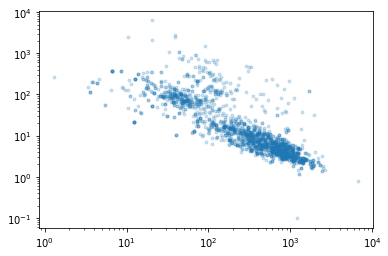

In [3]:
plt.loglog(systems.catalogue['dist']/const.pc.value, fstar/noise, '.', alpha=0.2)
plt.show()

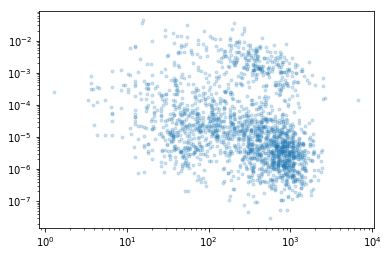

In [4]:
plt.loglog(systems.catalogue['dist']/const.pc.value, fp/noise, '.', alpha=0.2)
plt.show()

In [5]:
phi = 45
Ii = 1.
Qi = 0.
Ui = 0
Vi = 0
stokes = np.array([Ii, Qi, Ui, Vi]).reshape(-1,1)
print(stokes)

[[1.]
 [0.]
 [0.]
 [0.]]


In [6]:
def phases_to_angles(phases, inc=90):
    angs = (phases*360+180)%360
    angs[angs>180] = 360-angs[angs>180]
    return angs

In [7]:
angs = np.linspace(0,180,1000)
rayStokesCurve = np.array([eppe.rayleigh_scatter(ang, stokes) for ang in angs])
rayPhaseCurve = np.sqrt(rayStokesCurve[:,1,0]**2+rayStokesCurve[:,2,0]**2)/rayStokesCurve[:,0,0]
lambertCurve = eppe.lambert_scatter(angs, stokes)[0]
polCurve = rayPhaseCurve*lambertCurve

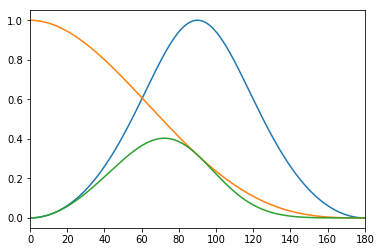

In [8]:
plt.plot(angs, rayPhaseCurve)
plt.plot(angs, lambertCurve)
plt.plot(angs, polCurve)
plt.xlim(0,180)
# plt.ylim(0,1)
plt.show()

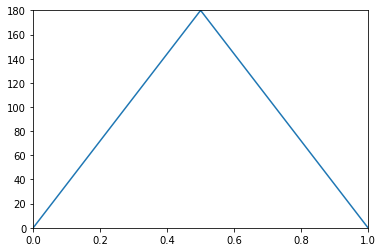

In [28]:
# for i in range(len(systems.catalogue['a'])):
i = 0

# randomly generate start time, and use determined integration duration
t0 = 0
t1 = systems.catalogue['per'][i]/3600/24

dist = systems.catalogue['dist'][i]
Porb = systems.catalogue['per'][i]/3600/24
a = systems.catalogue['a'][i]
# inc = systems.catalogue['inc'][i]
inc = 90
# e = systems.catalogue['e'][i]
e = 0
# argp = systems.catalogue['argp'][i]
argp = 90
# Omega = systems.catalogue['Omega'][i]
Omega = 270

orb = eppe.KeplerOrbit(Porb=Porb, a=a, inc=inc, e=e, argp=argp, Omega=Omega)

times = np.linspace(t0, t1, 1000)
phases = (times-orb.t0)/orb.Porb

r = np.array(orb.xyz(times))

angs = eppe.xyz_to_scatAngle(r, dist)

plt.plot(phases, angs)
plt.ylim(0,180)
plt.xlim(0,1)
plt.show()

In [21]:
rayStokesCurve = np.array([eppe.rayleigh_scatter(ang, stokes) for ang in angs])
rayPhaseCurve = np.sqrt(rayStokesCurve[:,1,0]**2+rayStokesCurve[:,2,0]**2)/rayStokesCurve[:,0,0]
lambertCurve = eppe.lambert_scatter(angs+180, stokes)[0]
polCurve = rayPhaseCurve*lambertCurve

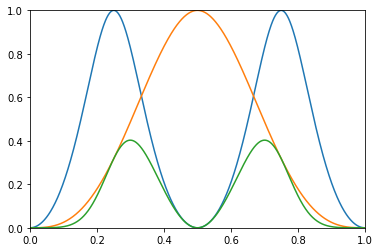

In [19]:
plt.plot(phases, rayPhaseCurve)
plt.plot(phases, lambertCurve)
plt.plot(phases, polCurve)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()